In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Load dataset (ensure the file is in the same directory or provide full path)
data = pd.read_csv("Sales Dataset.csv")

# Optional: Preview column names (helpful for checking issues)
print("Columns in dataset:", data.columns)

Columns in dataset: Index(['Order ID', 'Amount', 'Profit', 'Quantity', 'Category', 'Sub-Category',
       'PaymentMode', 'Order Date', 'CustomerName', 'State', 'City',
       'Year-Month'],
      dtype='object')


In [ ]:
data.drop_duplicates(inplace=True)
data.fillna(method='ffill', inplace=True)

In [8]:
if 'OrderDate' in data.columns:
    data['OrderDate'] = pd.to_datetime(data['OrderDate'], errors='coerce')
    data['Month'] = data['OrderDate'].dt.month
    data['Year'] = data['OrderDate'].dt.year
else:
    print("⚠️ Column 'OrderDate' not found.")

# Create CustomerAgeGroup if 'CustomerAge' exists
if 'CustomerAge' in data.columns:
    data['CustomerAge'] = pd.to_numeric(data['CustomerAge'], errors='coerce')
    data['CustomerAgeGroup'] = pd.cut(
        data['CustomerAge'],
        bins=[18, 30, 45, 60, 100],
        labels=['18-30', '31-45', '46-60', '60+']
    )
else:
    print("⚠️ Column 'CustomerAge' not found.")

# Step 4: Ensure Data Integrity and Consistency
assert not data.isnull().values.any(), "❌ Data still contains null values"
assert data.duplicated().sum() == 0, "❌ Data still contains duplicates"


⚠️ Column 'OrderDate' not found.
⚠️ Column 'CustomerAge' not found.


In [12]:
assert not data.isnull().values.any(), "❌ Data still contains null values"
assert data.duplicated().sum() == 0, "❌ Data still contains duplicates"

In [14]:
print("\n📊 Data Summary:\n", data.describe())

if 'ProductCategory' in data.columns:
    print("\n🛍️ Product Category Counts:\n", data['ProductCategory'].value_counts())
else:
    print("⚠️ Column 'ProductCategory' not found.")

if 'Region' in data.columns and 'Sales' in data.columns:
    print("\n📈 Sales by Region:\n", data.groupby('Region')['Sales'].sum())
else:
    print("⚠️ Columns 'Region' or 'Sales' not found.")


📊 Data Summary:
             Amount       Profit     Quantity
count  1194.000000  1194.000000  1194.000000
mean   5178.089615  1348.992462    10.674204
std    2804.921955  1117.992573     5.777102
min     508.000000    50.000000     1.000000
25%    2799.000000   410.000000     6.000000
50%    5152.000000  1014.000000    11.000000
75%    7626.000000  2035.000000    16.000000
max    9992.000000  4930.000000    20.000000
⚠️ Column 'ProductCategory' not found.
⚠️ Columns 'Region' or 'Sales' not found.


In [16]:
if 'Sales' in data.columns:
    data['Sales'] = pd.to_numeric(data['Sales'], errors='coerce')
    iso = IsolationForest(contamination=0.01, random_state=42)
    data['Anomaly'] = iso.fit_predict(data[['Sales']])
    anomalies = data[data['Anomaly'] == -1]
    print(f"\n🚨 Found {len(anomalies)} anomalies in Sales data.")
else:
    print("⚠️ Column 'Sales' not found.")

⚠️ Column 'Sales' not found.


In [18]:
if 'Sales' in data.columns:
    data['Sales'] = np.log1p(data['Sales'])

⚠️ 'Month' column not available for line plot.


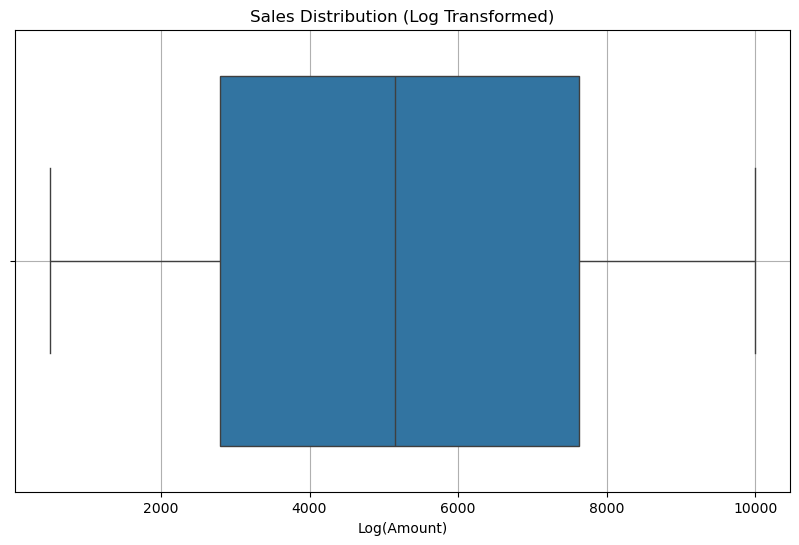

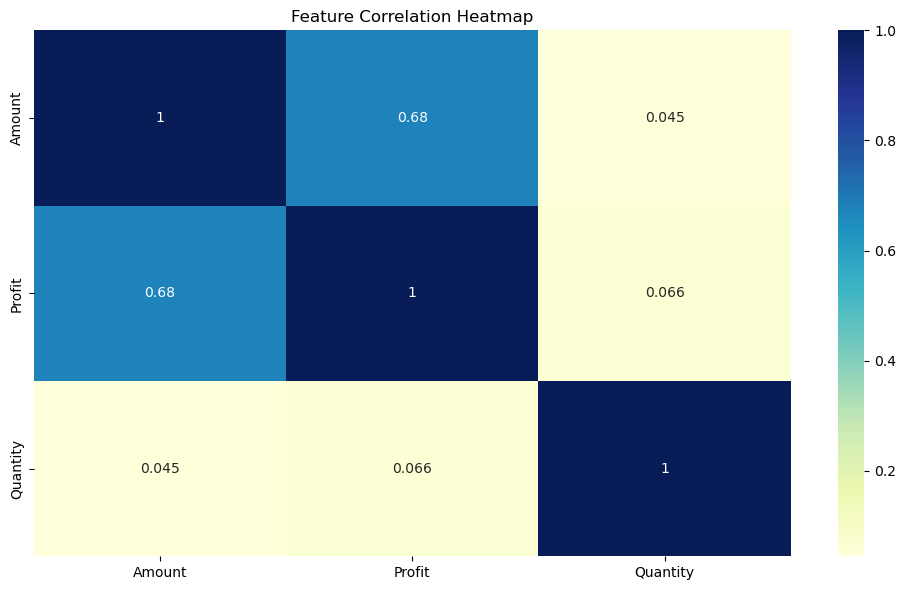

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Amount'])
plt.title("Sales Distribution (Log Transformed)")
plt.xlabel("Log(Amount)")
plt.grid(True)

# Line plot of Monthly Sales
if 'Month' in data.columns:
    plt.figure(figsize=(12, 6))
    monthly_sales = data.groupby('Month')['Sales'].mean()
    sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
    plt.title("Average Monthly Sales")
    plt.xlabel("Month")
    plt.ylabel("Avg Log(Sales)")
    plt.grid(True)
else:
    print("⚠️ 'Month' column not available for line plot.")

# Heatmap of Correlations
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="YlGnBu")
plt.title("Feature Correlation Heatmap")

plt.tight_layout()
plt.show()